In [ ]:
#### IMPORT LIBS ####
import pandas as pd
import numpy as np
import os, glob, shutil, subprocess

import matplotlib.pyplot as plt

In [ ]:
#### IMPORT DATA AND PATHS ####
## METADATA
meta_data = "/Users/marenatrinidad/Code/TCR_Analysis_JH/Metadata_JH.csv"

## FASTQS
fastq_dir = "/Users/marenatrinidad/Code/TCR_Analysis_JH/Fastq/"
r1_suffix = "_R1.fastq.gz"
r2_suffix = "_R2.fastq.gz"
fastqs = [x for x in glob.glob(f"{fastq_dir}*.gz", recursive=True)]

## CONSOLIDATE FASTQS
#for fq in fastq_dir:
#    file = fq.split("/")[-1]
#    shutil.move(fq, fastq_dir+file)

## OUTPUT DIR: Creates file of this name in fastq dir
out_folder_name = "Output_03072023Miseq"

## IMMUNE PROFILER PATH
immune_profiler_exe = "/Users/marenatrinidad/Code/TCR_Analysis_JH/immune_profiler/immune_profiler.py"

## RUNTIME PARAMS
receptor = "TCRv2"
target = "CDR3"
umi_cutoff = 3

In [ ]:
#### RUN PIPELINE ####
cogent_cmd = f"""python3 {immune_profiler_exe} -r {receptor} -f {fastq_dir} -m {meta_data} -o {out_folder_name} -t {target} --umi_cutoff {umi_cutoff}"""
#os.system(cogent_cmd)


2023-03-10 19:23:03 [INFO] Loading meta data file specified by user
2023-03-10 19:23:03 [INFO] Starting preprocessing
2023-03-10 19:31:26 [INFO] Completed preprocessing
2023-03-10 19:31:26 [INFO] Starting UMI guided analysis…
2023-03-10 19:31:26 [INFO] Preparing MIGEC input files
2023-03-10 19:31:26 [INFO] Conducting MIGEC analysis
2023-03-10 19:31:26 [INFO] Processing fastq file check
2023-03-10 19:56:29 [INFO] Processing UMI check
2023-03-10 20:01:58 [INFO] Processing consensus read assembly
2023-03-10 21:20:29 [INFO] Summarizing MIGEC results
2023-03-10 21:20:29 [INFO] Finished MIGEC process
2023-03-10 21:20:30 [INFO] Starting reads alignment, assembling, and clonotype calling
2023-03-10 21:20:30 [INFO] Processing CDR3 region of sample 2EDVmCherryPositive_TRA...
2023-03-10 21:20:46 [INFO] Processing CDR3 region of sample 2EDVmCherryPositive_TRB...
2023-03-10 21:21:01 [INFO] Processing CDR3 region of sample 2EDVmCherryNegative_TRA...
2023-03-10 21:22:28 [INFO] Processing CDR3 region 

0

2EDVmCherryNegative
4EDVmCherryNegative
6EDVmCherryNegative
13LVmCherryNegative
2EDVmCherryPositive
4EDVmCherryPositive
6EDVmCherryPositive
13LVmCherryPositive
14LVmCherryNegative
17LVmCherryNegative
14LVmCherryPositive
17LVmCherryPositive


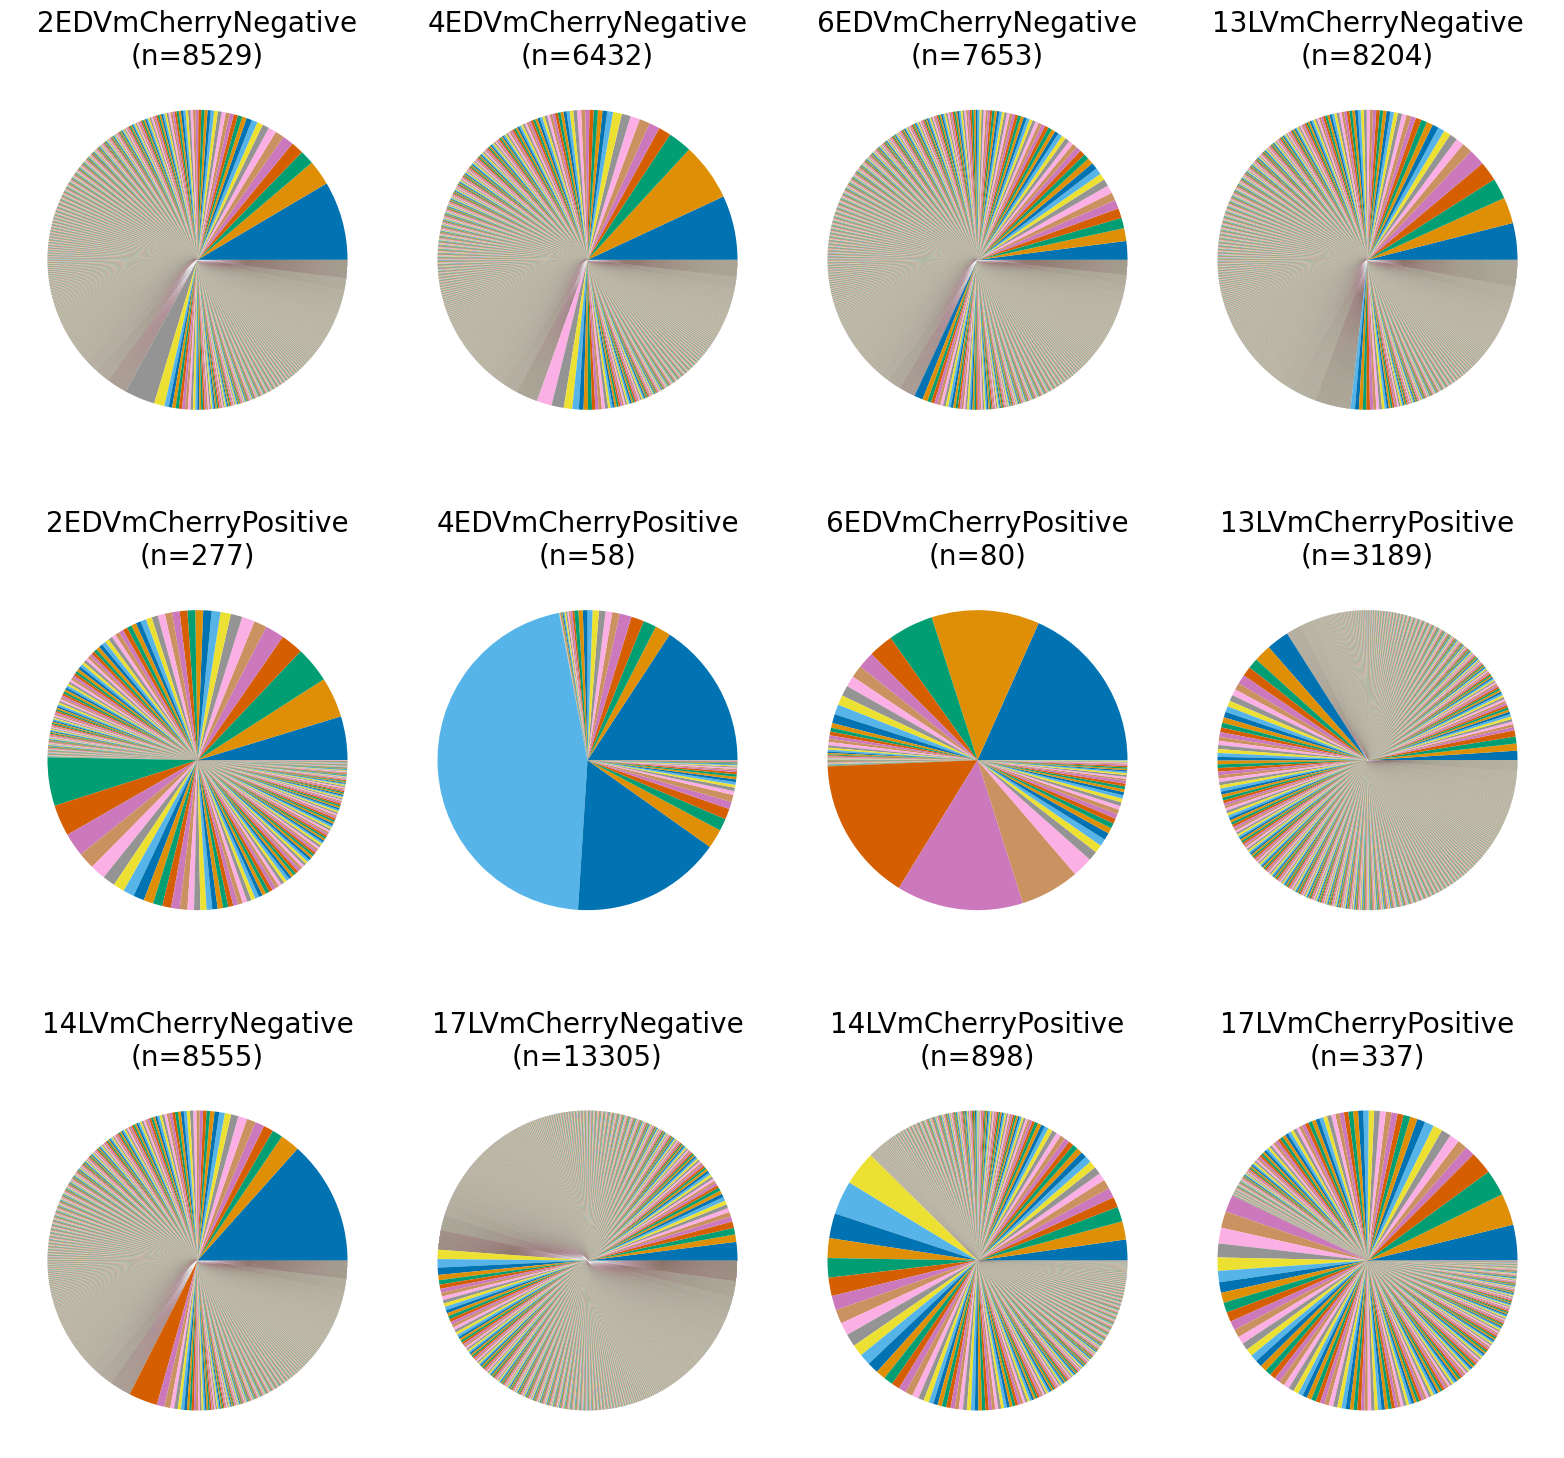

In [ ]:
#### PLOT PIES ####
out_dir = "/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/"
csvs = [x for x in glob.glob(f"{out_dir}*/*.csv", recursive = True) if out_folder_name in x.split("/")[-1] and "stats" not in x]
#targets = ["TRA", "TRB"]
n_subs = 12
n_cols = 4
n_rows = int(np.ceil(12/n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5.25*n_rows, 5.2*n_rows))
axs = axes.flatten()
graph_order =['/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_2EDVmCherryNegative_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_4EDVmCherryNegative_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_6EDVmCherryNegative_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_13LVmCherryNegative_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_2EDVmCherryPositive_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_4EDVmCherryPositive_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_6EDVmCherryPositive_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_13LVmCherryPositive_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_14LVmCherryNegative_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_17LVmCherryNegative_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_14LVmCherryPositive_mig_cdr3_report.csv',
              '/Users/marenatrinidad/Code/TCR_Analysis_JH/Output_03072023Miseq/airr_report/Output_03072023Miseq_17LVmCherryPositive_mig_cdr3_report.csv',
             ]

for i, ax in enumerate(axs):
    summary_csv = graph_order[i]
    base = summary_csv.replace(out_dir, "").replace("airr_report/Output_03072023Miseq_", "").split("_")[0]
    print(base)
    temp_df = pd.read_csv(summary_csv)
    ax.pie(temp_df.read_count, )
    ax.set_title(f"{base}\n(n={temp_df.shape[0]})", size = 20)

plt.tight_layout()
fig.savefig("Clonality_Pies.svg")